# 🚀 Let’s gear up!  

Before we dive in, we need to pack our toolkit:  
* 🐍 **Python essentials** (pandas, numpy, etc.)  
* 🛠️ **Data wrangling sidekicks**  
* 🐬 **mysql.connector** – because we’re going to chat with our MySQL database in this project.  

Think of it like assembling the Avengers… but for data. 😉


In [1]:
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 🤫 Shhh… let's silence those pesky warnings
import warnings
warnings.filterwarnings('ignore')

# 🔌 Time to plug in!  

Let’s connect to our database and grab some tables 🗄️  
* Think of it as sending a friendly “Hey, can I see your data?” message. 😎  
* Tables incoming… brace yourselves! 📥


In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="e_master_card"
)


df_cust = pd.read_sql('SELECT * FROM customers', conn)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [3]:
df_transactions = pd.read_sql('SELECT * FROM transactions', conn)
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [4]:
df_credit_profiles = pd.read_sql('SELECT * FROM credit_profiles', conn)
df_credit_profiles.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


# 🔍 Spotting Sneaky Values with `describe()`  

Ever wonder what’s hiding in your dataset? 🤔  
Pandas’ `describe()` method is like your magnifying glass 🕵️‍♂️ – it quickly shows you:  
* **Count** – how many brave souls made it into each column  
* **Mean & Std** – the average and spread, helping you spot outliers 👀  
* **Min & Max** – the smallest and largest sneaky numbers trying to mess with your stats  
* **Quartiles (25%, 50%, 75%)** – the middle guards keeping your data in check  

💡 Pro tip: Run `df.describe()` and you might just catch those sneaky outliers before they cause chaos!


In [5]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


# 🕳️ Hunting for Missing Values with `isnull()`  

Some values like to play hide-and-seek… 😏  
Pandas’ `isnull()` is your secret weapon to find them:  
* It marks **all the sneaky `NaN`s** in your DataFrame  
* Combine it with `.sum()` to get a quick headcount of the missing troublemakers 🧮  
* Perfect for spotting gaps before they trip you up in analysis ⚡  

💡 Pro tip: `df.isnull().sum()` = fast missing-value detective work!


In [6]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [7]:
csv_cust = pd.read_csv('data/customers.csv')
csv_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [8]:
csv_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [9]:
csv_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


# ⚠️ Warning: `annual_income` is infected!  

Oh no! 😱 Our `annual_income` column has **50 sneaky null values** hiding inside.  
* Looks like it caught the missing-value bug 🦠  
* Time to clean it up before it spreads chaos in our analysis 🧹💪


In [10]:
# Let's dive deeper for annual _income
csv_cust.annual_income.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999    False
Name: annual_income, Length: 1000, dtype: bool

In [11]:
# Let's print those records to make sure they are all NaN
csv_cust[csv_cust.annual_income.isnull()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Verma,Male,52,City,Business Owner,NaN,Single
186,187,Samar Sardar,Male,53,City,Consultant,NaN,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,NaN,Married
232,233,Aditya Goel,Male,26,City,Freelancer,NaN,Married


# 🛠️ Time to Heal Our Data!  

Those pesky `NaN` values won’t fix themselves 😅  
We have a few options:  
* ❌ **Remove rows with NaN** – but beware, we’d lose valuable data  
* 🧮 **Replace with mean** – simple, but weak against outliers  
* 🏆 **Replace with median** – strong and resilient, our best choice 💪  

For this project, we’re going **full median mode** to keep our data healthy and robust!


In [12]:
csv_cust.annual_income.median()

np.float64(112218.5)

In [13]:
csv_cust.groupby('occupation')['annual_income'].apply(list)

occupation
Accountant             [77588.0, 67751.0, 60750.0, 66647.0, 71601.0, ...
Artist                 [nan, 33377.0, 7621.0, 35667.0, 37897.0, 45794...
Business Owner         [358211.0, 259013.0, 435536.0, 360483.0, 50.0,...
Consultant             [65172.0, 39406.0, 107167.0, 17575.0, 94672.0,...
Data Scientist         [189453.0, 10672.0, 94444.0, 105583.0, 121738....
Freelancer             [22378.0, 33563.0, 44887.0, 159400.0, 39832.0,...
Fullstack Developer    [34814.0, 109158.0, 48825.0, 15095.0, 55682.0,...
Name: annual_income, dtype: object

In [14]:
for occ, inc in csv_cust.groupby('occupation')['annual_income']:
    print(f'{occ}: {inc}')

Accountant: 10     77588.0
11     67751.0
20     60750.0
72     66647.0
114    71601.0
225    79953.0
295    55254.0
325    61021.0
557    69919.0
604    63883.0
660    55489.0
710    66855.0
745    77114.0
748    62037.0
933    27895.0
950    62220.0
Name: annual_income, dtype: float64
Artist: 14         NaN
19     33377.0
41      7621.0
62     35667.0
63     37897.0
127    45794.0
129    74464.0
130    59543.0
150    61482.0
204    45048.0
207    59356.0
211    46738.0
218    76263.0
257    35731.0
336    79267.0
358    52885.0
368    38630.0
371    34205.0
410    21827.0
571    48608.0
612    44782.0
658    32760.0
688        NaN
689    41967.0
705    46682.0
738    37472.0
797    32710.0
815    59941.0
823    47988.0
869    47559.0
872    57842.0
873    69080.0
927    48942.0
934    42753.0
935    17752.0
938    52069.0
956        NaN
959     9667.0
Name: annual_income, dtype: float64
Business Owner: 0      358211.0
6      259013.0
21     435536.0
26     360483.0
31         50.0
  

# 👔 Smarter Imputation: Occupation-Wise Median  

Why settle for a plain median of `annual_income`? 🤔  
Different occupations have very different income patterns. 💼💰  

Let’s do it smarter:  
* Group the data by `occupation`  
* Calculate the **median income within each group**  
* Fill the missing `annual_income` based on these occupation-specific medians  

This way, our data stays realistic and we respect each profession’s earning vibe! 😎


In [15]:
csv_cust[csv_cust['occupation'] == 'Data Scientist'].annual_income.tolist()

[189453.0,
 10672.0,
 94444.0,
 105583.0,
 121738.0,
 160219.0,
 145795.0,
 135479.0,
 135759.0,
 182544.0,
 118963.0,
 153225.0,
 54288.0,
 57545.0,
 176363.0,
 108807.0,
 124090.0,
 nan,
 182998.0,
 195686.0,
 180608.0,
 196585.0,
 122508.0,
 150480.0,
 168269.0,
 152828.0,
 124973.0,
 175619.0,
 nan,
 96405.0,
 156671.0,
 174253.0,
 115280.0,
 93963.0,
 171203.0,
 23667.0,
 171653.0,
 186609.0,
 133189.0,
 117773.0,
 141741.0,
 135474.0,
 190344.0,
 109050.0,
 107622.0,
 10847.0,
 168348.0,
 96494.0,
 172924.0,
 nan,
 195695.0,
 99417.0,
 196607.0,
 50.0,
 151432.0,
 164717.0,
 149105.0,
 148069.0,
 159476.0,
 158322.0,
 124138.0,
 191685.0,
 171556.0,
 180424.0,
 137381.0,
 123922.0,
 148674.0,
 nan,
 129765.0,
 125013.0,
 108063.0,
 141158.0,
 153399.0,
 158997.0,
 182741.0,
 120871.0,
 nan,
 106161.0,
 107739.0,
 116545.0,
 159157.0,
 153147.0,
 97357.0,
 109181.0,
 104374.0,
 nan,
 nan,
 125037.0,
 169350.0,
 190369.0,
 109012.0,
 113191.0,
 6779.0,
 56534.0,
 181135.0,
 97061.0

In [16]:
csv_cust[csv_cust['occupation'] == 'Data Scientist'].annual_income.median()

np.float64(135759.0)

In [17]:
# Let's get annual_income per occupation.
occ_wise_inc_median = csv_cust.groupby('occupation')['annual_income'].median()
occ_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [18]:
occ_wise_inc_median['Artist'] # works perfect

np.float64(45794.0)

In [19]:
# Let's indeed start replacing null values with median values from related fields.
df_cust['annual_income'] = csv_cust.apply(
    lambda row: occ_wise_inc_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
    axis=1
)

In [20]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [21]:
csv_cust.iloc[[14, 82, 998, 22]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
998,999,Amara Rathore,Female,47,City,Business Owner,NaN,Married
22,23,Ishan Patel,Male,19,City,Freelancer,36863.0,Married


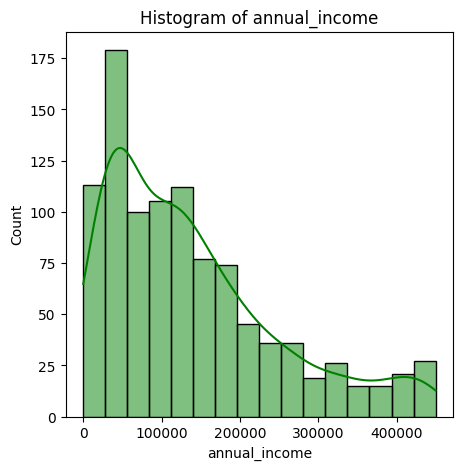

In [22]:
# Let's draw histplot to se distribution of these `annual_income` values.
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], kde=True, color='green', label='data')
plt.title('Histogram of annual_income')
plt.show()

# 📊 Distribution of Annual Income  

Here’s the histogram of `annual_income`.  

👉 Notice how the distribution is **right-skewed** (positively skewed):  
* Most people cluster in the **lower-to-mid income ranges**  
* As income increases, the number of people drops off sharply  
* This makes sense in real life — fewer people earn very high incomes 💸  

So yes, our dataset reflects reality: lots of modest earners, only a handful of big spenders at the far right tail. 😉


# 🚦 Time to Officially Tackle Outliers  

We’ve dealt with missing values — now it’s time to roll up our sleeves and handle the **outliers**.  
These extreme values can seriously mess with our analysis if left unchecked, so let’s give them the attention they deserve. 🔍⚡


In [23]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [24]:
# Let's remove some outlier with Business knowledge. Let's assume Business Owner said any income under the 100$ is an outlier.
df_cust[df_cust.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [25]:
# We are going to use same approach as median however we wont use `apply` method. Let' use different practice.

for index, row in df_cust.iterrows():
    if row['annual_income'] < 100:
        df_cust.at[index, 'annual_income'] = occ_wise_inc_median[row['occupation']]
else:
    print('Done')

Done


In [26]:
df_cust[df_cust.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [27]:
df_cust.iloc[[31, 262]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,261191.5,Married


In [28]:
# lET'S CHANGE IT TO MEAN FOR NOW
# Let's get annual_income per occupation.
avg_income_per_occupation = df_cust.groupby('occupation')['annual_income'].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

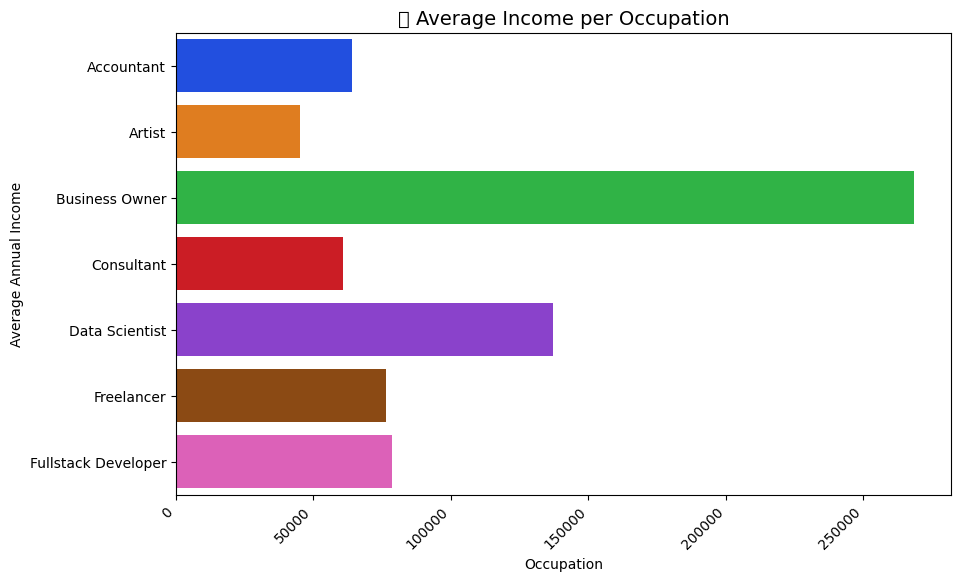

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Turn the Series into a DataFrame
avg_income_df = avg_income_per_occupation.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_income_df,
    x="annual_income",
    y="occupation",
    palette="bright"
)

plt.xticks(rotation=45, ha="right")
plt.title("💼 Average Income per Occupation", fontsize=14)
plt.xlabel("Occupation")
plt.ylabel("Average Annual Income")
plt.show()


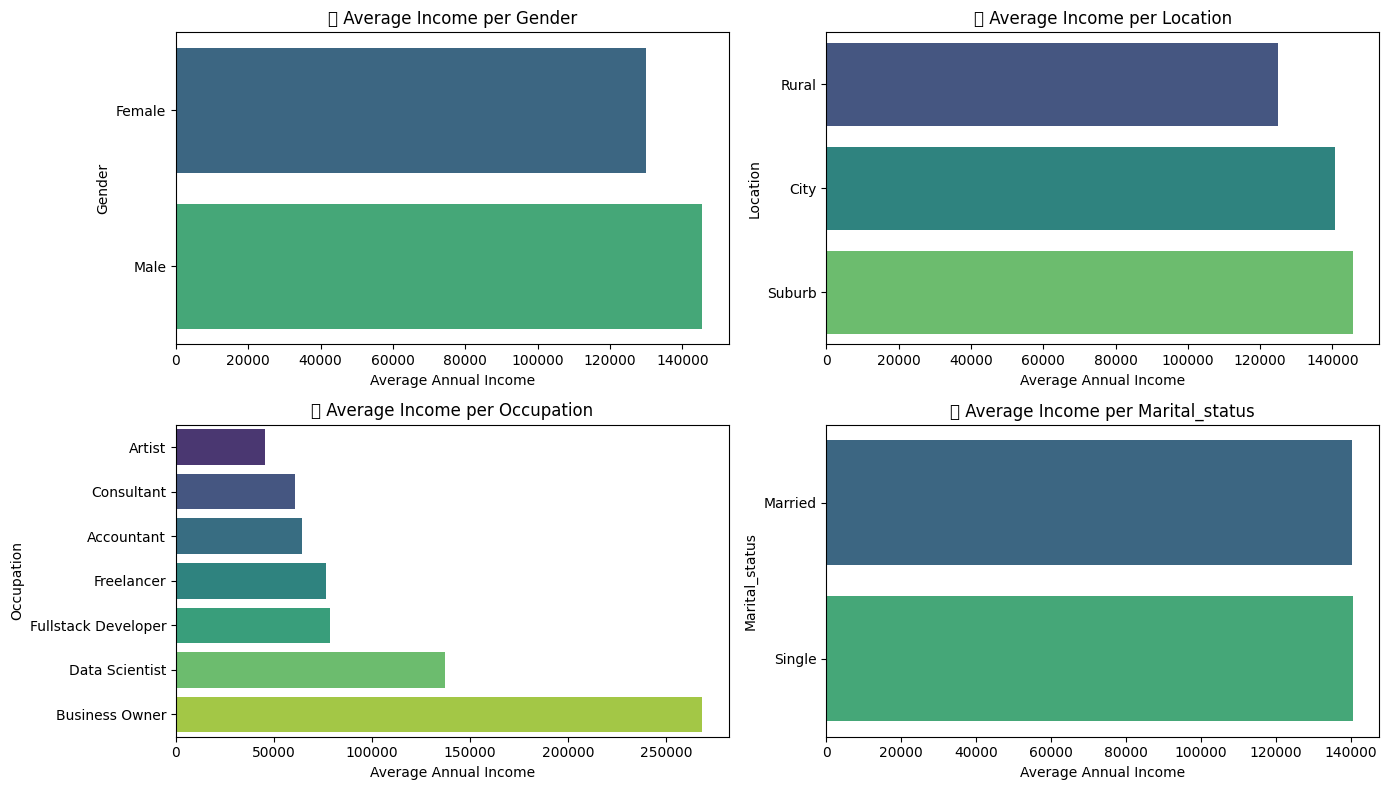

In [30]:
# Let's check Average Income Per Occupation
import seaborn as sns
import matplotlib.pyplot as plt
import math

categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Determine rows and columns
n_cols = 2
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*4))
axes = axes.flatten()  # Flatten in case of single row/column

for i, col in enumerate(categorical_columns):
    avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()
    avg_income_df = avg_income_per_group.reset_index()
    
    sns.barplot(
        data=avg_income_df,
        y=col,
        x='annual_income',
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f"💼 Average Income per {col.capitalize()}", fontsize=12)
    axes[i].set_xlabel("Average Annual Income")
    axes[i].set_ylabel(col.capitalize())

# Hide any unused subplots if columns < rows*cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [31]:
# Now let's start with Age column. Let's treat Outliers in Age Column
csv_cust = pd.read_csv('data/customers.csv')
csv_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [32]:
csv_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

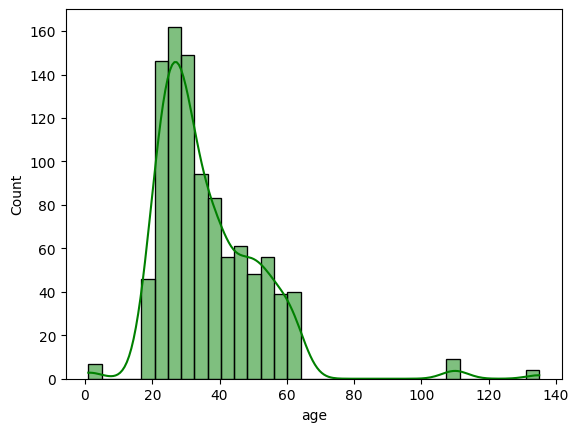

In [33]:
sns.histplot(csv_cust.age, kde=True, color='g')

In [34]:
age_mean = csv_cust.age.mean()
age_std = csv_cust.age.std()

In [35]:
lower = age_mean - 3*age_std
upper = age_mean + 3*age_std

lower, upper

(np.float64(-10.593464130550373), np.float64(83.40346413055038))

📊 **Outlier Detection using 3×STD Approach**

Normally, using the **3×standard deviation (STD) method**—a common measure of dispersion—we would flag any value **greater than 83** or **less than -10** as an outlier.  

❌ But for the **age** column, a value like **-10** clearly doesn’t make sense.  

💡 This is where **business knowledge** comes in!  
Our business manager has clarified that a valid age is **only between 15 and 80 years**.  

✅ So instead of blindly relying on the 3×STD rule, we’ll use this **domain knowledge** to clean the data and make smarter decisions.


In [36]:
outliers = csv_cust[(csv_cust['age'] <= 15) | (csv_cust['age'] >= 80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [37]:
# first let's check if we have null value in age. HANDLING NULL AND THEN HANDLING OUTLIERS.
csv_cust.age.isnull().sum()

np.int64(0)

In [38]:
# Since no outlier, we are going to replace those ages with median. But hold on not onlymedian. We gon do occupation-wsie median.
occ_wise_age_median = csv_cust.groupby('occupation')['age'].median()
occ_wise_age_median

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [39]:
for index, row in outliers.iterrows():
    csv_cust.at[index, 'age'] = occ_wise_age_median[row['occupation']]
    df_cust.at[index, 'age'] = occ_wise_age_median[row['occupation']]

In [40]:
outliers = csv_cust[(csv_cust['age'] <= 15) | (csv_cust['age'] >= 80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [41]:
csv_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,35.541500,139410.314737
std,288.819436,12.276634,112416.802007
min,1.000000,18.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,44.250000,193137.500000
max,1000.000000,64.000000,449346.000000


# Data Visualization: Age, Gender, Location

📊 **Visualizing Age, Gender, and Location Together**

Usually, we can plot **separate charts** for each column—Age, Gender, Location—but there’s a **better way**: the **stacked bar chart**.  

💡 **Why stacked bars?**  
- They let us represent **different categories in a single chart**.  
- For our case, we can see **which age groups live in which locations** and **their gender distribution** all at once.  
- This helps us **understand the interaction between Age, Location, and Gender** more clearly.  

✅ **Key Benefits:**  
- Quickly spot **which age groups dominate certain areas**.  
- Visualize **gender distribution within each age group and location**.  
- Understand the **impact of multiple factors on customer distribution** without flipping between multiple plots.  

🎯 In short: a stacked bar chart gives a **compact, insightful view** of our customers across age, gender, and location, letting us make **smarter data-driven decisions**.


In [42]:
# First let's use pie-chart in order to decide how many people we have in each age-group. 
# So as a first step we have to form those age-groups.

# csv_cust.age.apply(
#     lambda x: print(x) if x >= 18 and x <= 25 else x
# )

# NOTE: We could use apply, lambda and etc here but it will be so slow in large datasets. So let's use pandas `cut` function.


# Define the bins and labels
bins = [17, 25, 48, 65]  # edges of your age groups
labels = ['18-25', '26-48', '49-65']

# Create a new column 'age_group'
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bins, labels=labels)

# Check the result
df_cust[['age', 'age_group']].head()

,age,age_group
0,51.0,49-65
1,47.0,26-48
2,21.0,18-25
3,24.0,18-25
4,48.0,26-48


In [43]:
age_group_count = df_cust.age_group.value_counts(normalize=True)*100
age_group_count

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

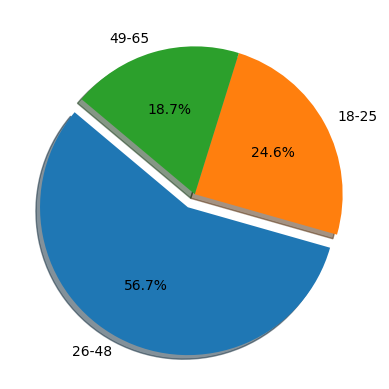

In [44]:
plt.pie(
    age_group_count, 
    labels=age_group_count.index,
    autopct='%1.1f%%', 
    shadow=True,
    explode=(0.1,0,0),
    startangle=140
)
plt.show()

In [45]:
age_group_count.index

CategoricalIndex(['26-48', '18-25', '49-65'], categories=['18-25', '26-48', '49-65'], ordered=True, dtype='category', name='age_group')

In [46]:
# Now let's get custoemr count per lcaotion and then count of gener of people per location.
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [47]:
custoemr_location_gender = df_cust.groupby(['location', 'gender']).size().unstack()
custoemr_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


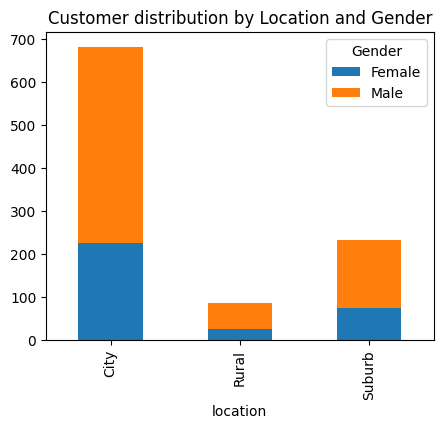

In [48]:
custoemr_location_gender.plot(kind='bar', stacked=True, figsize=(5,4))
plt.legend(title='Gender')
plt.title('Customer distribution by Location and Gender')
plt.show()

<h1 style="text-align: center;">🔍 Explore Credit Score Table</h1>

In [49]:
df_credit_profiles.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [50]:
df_credit_profiles.shape

(1004, 6)

In [51]:
df_cust.shape

(1000, 9)

### Note that df_credit_profiles is 4 rows less than df_cust. There must be some duplicates in df_credit_profiles.

In [52]:
df_credit_profiles['cust_id'].nunique() # it is going to show us the count of unique rows

1000

In [53]:
df_credit_profiles[df_credit_profiles['cust_id'].duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [54]:
df_credit_profiles_1 = df_credit_profiles.drop_duplicates(subset='cust_id', keep='last')
df_credit_profiles_1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [55]:
df_credit_profiles_1[df_credit_profiles_1['cust_id'].duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [56]:
df_credit_profiles_1[df_credit_profiles_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [57]:
df_credit_profiles_1.credit_limit.describe()

count      935.000000
mean     19235.561497
std      24489.997195
min        500.000000
25%        750.000000
50%       1250.000000
75%      40000.000000
max      60000.000000
Name: credit_limit, dtype: float64

💳 **Handling `credit_limit` Null Values**

When dealing with missing values in the **`credit_limit`** column, one simple option is to fill them using the **mean or median**.  

⚠️ But don’t rush! Before we impute, we need to **check if there are any levels (patterns/segments)**.  

💡 Remember:  
- **Credit limit is tied to credit score**.  
- If the **credit score is high**, the **credit limit will also be high**.  
- If the **credit score is low**, the **credit limit will be lower**.  

✅ So instead of blindly filling with mean/median, we should consider the **relationship between credit score and credit limit** for a smarter imputation.


In [58]:
df_credit_profiles_1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

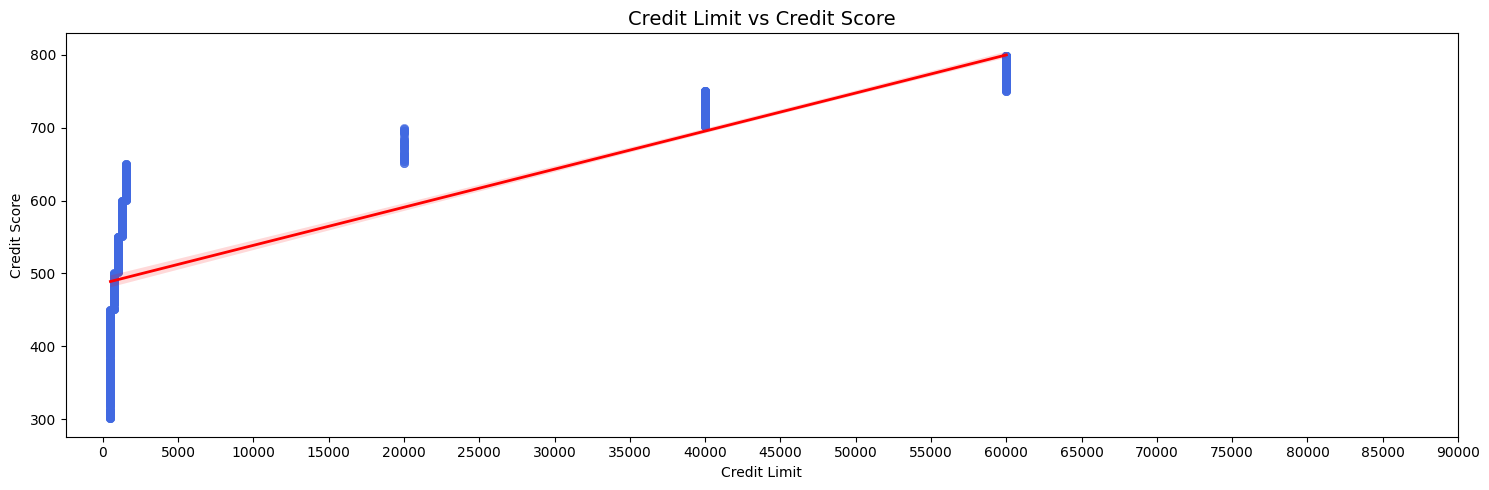

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

# Scatter with transparency + better colors
sns.scatterplot(
    data=df_credit_profiles_1,
    x="credit_limit",
    y="credit_score",
    alpha=0.6,        # transparency to reduce overlap
    color="royalblue", 
    edgecolor=None
)

# Add a trend line to see the relationship
sns.regplot(
    data=df_credit_profiles_1,
    x="credit_limit",
    y="credit_score",
    scatter=False,    # don't duplicate scatter
    color="red", 
    line_kws={"lw":2}
)

plt.title("Credit Limit vs Credit Score", fontsize=14)
plt.xlabel("Credit Limit")
plt.ylabel("Credit Score")
plt.xticks(range(0, 90001, 5000))
plt.tight_layout()
plt.show()


In [60]:
# So let's create groups of credit score just like we did for ages. We gon use `cat` function for that again.
bin_ranges = [300, 450, 500, 550, 600, 750, 800]

bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

df_credit_profiles_1['credit_score_range'] = pd.cut(df_credit_profiles_1['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

In [61]:
df_credit_profiles_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,600-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,600-749


In [62]:
bin_ranges[1:]

[450, 500, 550, 600, 750, 800]

In [63]:
# Let's find the most frequents in credit_score_range column. Because we are going to use most frequent in order to replace related credit_limits.
mode_df = df_credit_profiles_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-749,40000.0
5,750-799,60000.0


In [64]:
df_credit_profiles_1[df_credit_profiles_1.credit_limit.isnull()].sample(10)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
45,46,761,0.596041,24234.0,2.0,NaN,750-799
190,191,794,0.340700,16522.0,0.0,NaN,750-799
902,899,775,0.487290,21548.0,0.0,NaN,750-799
802,799,508,0.255638,168.0,2.0,NaN,500-549
824,821,426,0.578425,177.0,3.0,NaN,300-449
351,352,736,0.367879,9916.0,2.0,NaN,600-749
505,506,722,0.745946,25243.0,3.0,NaN,600-749
35,36,790,0.112535,4261.0,1.0,NaN,750-799
325,326,599,0.791918,501.0,0.0,NaN,550-599
126,127,522,0.287678,204.0,4.0,NaN,500-549


In [65]:
df_credit_profiles_2 = pd.merge(df_credit_profiles_1, mode_df, on='credit_score_range', suffixes=('', '_mode'))
df_credit_profiles_2.sample(10)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
790,791,617,0.739044,768.0,3.0,1500.0,600-749,40000.0
213,214,698,0.353282,6171.0,1.0,20000.0,600-749,40000.0
237,238,771,0.722431,36090.0,0.0,60000.0,750-799,60000.0
636,637,420,0.323984,140063.0,4.0,500.0,300-449,500.0
411,412,559,0.828766,586.0,3.0,1250.0,550-599,1250.0
246,247,554,0.872053,596.0,2.0,1250.0,550-599,1250.0
892,893,783,0.416364,18584.0,2.0,60000.0,750-799,60000.0
351,352,736,0.367879,9916.0,2.0,NaN,600-749,40000.0
769,770,539,0.860913,725.0,2.0,1000.0,500-549,1000.0
430,431,610,0.741063,628.0,4.0,NaN,600-749,40000.0


In [66]:
df_credit_profiles_2[df_credit_profiles_2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
768,769,563,0.865592,898.0,3.0,NaN,550-599,1250.0
399,400,754,0.884299,32031.0,2.0,NaN,750-799,60000.0
944,945,526,0.272734,227.0,1.0,NaN,500-549,1000.0


In [67]:
df_credit_profiles_3 = df_credit_profiles_2.copy()
df_credit_profiles_3['credit_limit'] = df_credit_profiles_3['credit_limit'].fillna(df_credit_profiles_3['credit_limit_mode'])
df_credit_profiles_3.shape

(1000, 8)

In [68]:
df_credit_profiles_2.sample(10)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
623,624,321,0.332068,128.0,2.0,500.0,300-449,500.0
878,879,387,0.399201,148.0,2.0,500.0,300-449,500.0
870,871,537,0.524505,373.0,1.0,1000.0,500-549,1000.0
845,846,716,0.163093,5191.0,0.0,40000.0,600-749,40000.0
668,669,788,0.312579,11737.0,4.0,60000.0,750-799,60000.0
774,775,371,0.286306,89.0,3.0,500.0,300-449,500.0
817,818,447,0.572532,239.0,2.0,500.0,300-449,500.0
732,733,361,0.699292,188.0,4.0,500.0,300-449,500.0
253,254,650,0.333095,327.0,4.0,1500.0,600-749,40000.0
113,114,578,0.254125,188.0,3.0,1250.0,550-599,1250.0


In [69]:
df_credit_profiles_3.isna().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [70]:
df_credit_profiles_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19946.250000,24875.000000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24732.756775,24855.130809
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,40000.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


### There some outliers in `outstanding_debt`. We could use any statistical approach but Business owner said - `outstanding_debt` cannot be more than `credit_limit`. So we are going to stick to business knowledge.

In [71]:
df_credit_profiles_3[df_credit_profiles_3.outstanding_debt > df_credit_profiles_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-749,40000.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,600-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,600-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,600-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,600-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


### Let's just take credit_limit value of same row and replace outlier in outstanding_debt with that. Becasue they wont be able to take more credit than limit. Therefore it won't hurt.

In [72]:
df_credit_profiles_3.loc[df_credit_profiles_3.outstanding_debt > df_credit_profiles_3.credit_limit, 'outstanding_debt'] = df_credit_profiles_3.credit_limit

In [73]:
df_credit_profiles_3[df_credit_profiles_3.outstanding_debt > df_credit_profiles_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [74]:
df_credit_profiles_3.loc[[1, 19]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,1500.0,3.0,1500.0,600-749,40000.0


### Let's do some correlation check.

In [75]:
# First let's join two tables `df_cust` and `df_credit_profiles_3` to have bigger table since they are realted to eachother with `cust_id`.
df_merged = pd.merge(df_cust, df_credit_profiles_3, on='cust_id', how='inner')
df_merged

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,600-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,600-749,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,26-48,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,26-48,725,0.249670,6973.0,2.0,40000.0,600-749,40000.0


In [76]:
df_merged[['credit_score', 'credit_limit']].corr()

,credit_score,credit_limit
credit_score,1.000000,0.849665
credit_limit,0.849665,1.000000


In [77]:
# Let's do for all cols
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income', 'age']
correlation_matrix = df_merged[numerical_cols].corr()

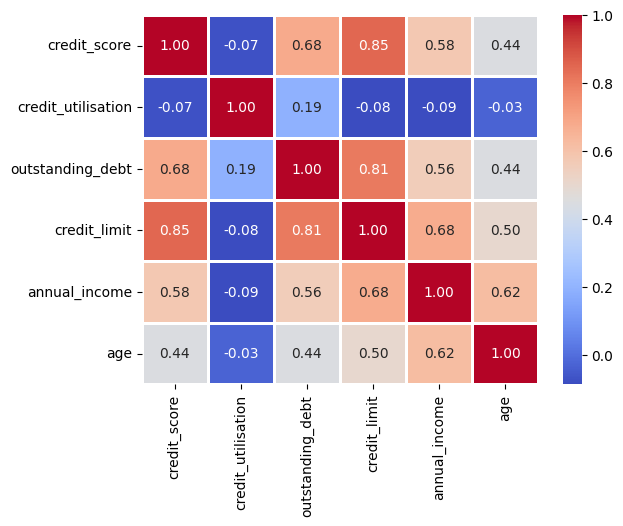

In [78]:
# Let's use seaborn's heatmap to visualize that correlation better.
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.8)
plt.show()

# Handling Null values in `transaction` dataframe

In [79]:
df_transactions.sample(10)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
499488,499489,78,2023-09-05,252,Amazon,Electronics,Gpay
151744,151745,809,2023-03-17,354,Flipkart,Sports,Gpay
479128,479129,412,2023-08-26,137,Cred,Beauty & Personal Care,Credit Card
321261,321262,793,2023-06-09,534,Amazon,Electronics,Gpay
217530,217531,932,2023-04-18,98,Flipkart,Fashion & Apparel,Net Banking
295620,295621,633,2023-05-27,105,Shopify,Fashion & Apparel,Credit Card
122583,122584,508,2023-03-02,205,Amazon,Electronics,Gpay
152462,152463,692,2023-03-17,314,Flipkart,Home Decor,Gpay
372341,372342,437,2023-07-04,109,Amazon,Fashion & Apparel,Gpay
321722,321723,164,2023-06-09,80,Flipkart,Fashion & Apparel,Phonepe


In [80]:
df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [81]:
df_transactions.shape

(500000, 7)

In [82]:
df_transactions[df_transactions.platform.isnull()].sample(10)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
70970,70971,963,2023-02-05,67485,None,Sports,Phonepe
76580,76581,406,2023-02-08,284,None,Kitchen Appliances,Phonepe
31456,31457,708,2023-01-16,100,None,Fashion & Apparel,Gpay
328845,328846,264,2023-06-13,47,None,Fashion & Apparel,Cash
328505,328506,892,2023-06-12,59996,None,Fashion & Apparel,Gpay
35587,35588,703,2023-01-18,204,None,Electronics,Credit Card
36265,36266,715,2023-01-18,128,None,Home Decor,Gpay
424878,424879,264,2023-07-30,899,None,Electronics,Credit Card
185782,185783,389,2023-04-03,87,None,Garden & Outdoor,Gpay
34420,34421,171,2023-01-17,68,None,Fashion & Apparel,Phonepe


In [83]:
df_transactions.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

In [84]:
df_transactions.product_category.value_counts()

product_category
Electronics               134535
Fashion & Apparel         116892
Kitchen Appliances         57353
Beauty & Personal Care     56065
Sports                     49704
Home Decor                 38355
Garden & Outdoor           23644
Books                      13635
Toys & Games                9817
Name: count, dtype: int64

In [85]:
df_transactions.payment_type.value_counts()

payment_type
Phonepe        144228
Credit Card    139778
Gpay           109218
Debit Card      59500
Net Banking     43223
Cash             4053
Name: count, dtype: int64

### 🛒 Handling Missing Values in `platform`

We can use **`mode`** to take the most frequent platform,  
but there are two better options:  

1. **Category-wise** (recommended)  
2. **Payment-type-wise**  

👉 I’ll go with **category-wise**, because different products can be bought from different platforms.  
It doesn’t make sense to assume that one single platform covers all products.  


In [86]:
category_wise_platform = df_transactions.groupby('product_category')['platform'].agg(lambda x: x.mode())[0]
category_wise_platform

'Amazon'

In [87]:
df_transactions_cleaned_1 = df_transactions.copy()
df_transactions_cleaned_1['platform'] = df_transactions_cleaned_1.apply(
    lambda row: category_wise_platform if pd.isnull(row['platform']) else row['platform'], 
    axis=1
)

In [88]:
df_transactions_cleaned_1.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [89]:
df_transactions_cleaned_1[df_transactions_cleaned_1.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


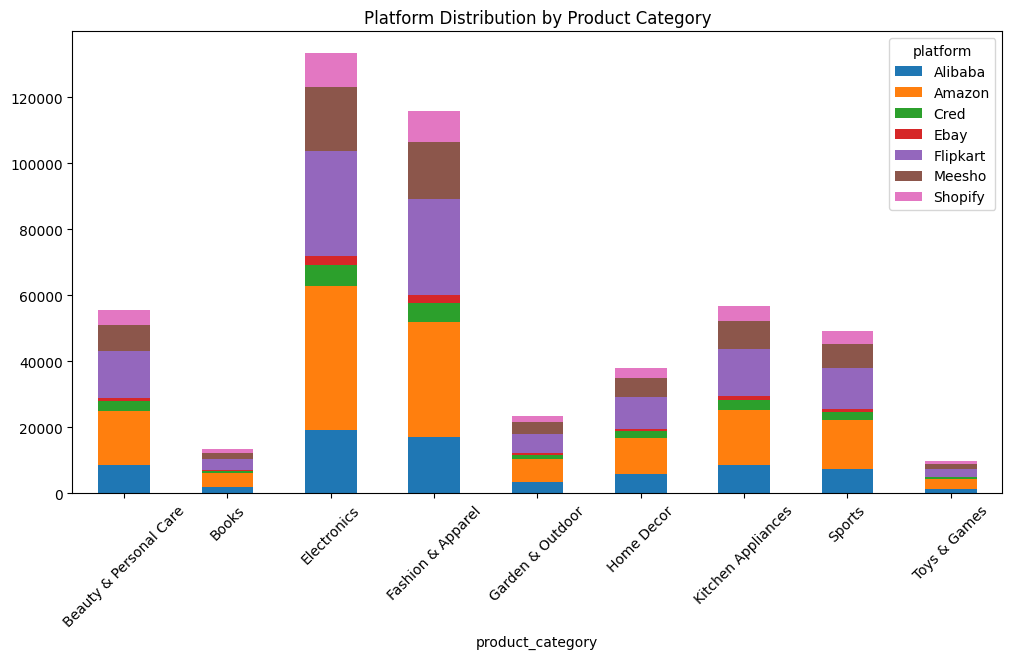

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stacked bar chart showing platform distribution by category
platform_by_category = df_transactions.groupby(['product_category', 'platform']).size().unstack(fill_value=0)
platform_by_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Platform Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

# By plotting this stacked bar chart with original `df_transaction` i actually showed we did right choice by selecting `Amazon` to imoute since it is our mode.

In [91]:
# Let's keep on trating outliers if we have any left.Business owner said transaction_amount cannot be zero. So let's check.
df_transactions_cleaned_1.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [93]:
# We indeed have 0 in `tran_amount`. Therefore let's treat 'em.
df_tran_amount_zero = df_transactions_cleaned_1[df_transactions_cleaned_1.tran_amount == 0]
df_tran_amount_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [104]:
df_tran_amount_zero[['platform', 'payment_type', 'product_category']].value_counts()

platform  payment_type  product_category
Amazon    Credit Card   Electronics         4734
Name: count, dtype: int64

In [106]:
df_trans_amount_no_zero = df_transactions_cleaned_1[

(df_transactions_cleaned_1.platform == 'Amazon') & 
(df_transactions_cleaned_1.payment_type == 'Credit Card') &
(df_transactions_cleaned_1.product_category == 'Electronics')

]
df_trans_amount_no_zero[df_trans_amount_no_zero.tran_amount > 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [108]:
median_to_replace_0_trans = df_trans_amount_no_zero[df_trans_amount_no_zero.tran_amount > 0].tran_amount.median()
median_to_replace_0_trans

np.float64(554.0)

In [109]:
df_transactions_cleaned_1['tran_amount'].replace(0, median_to_replace_0_trans, inplace=True)
df_transactions_cleaned_1.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


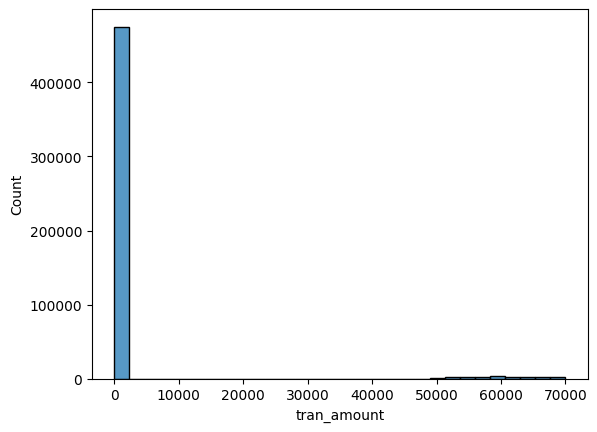

In [111]:
# Let's visualize
sns.histplot(df_transactions_cleaned_1.tran_amount, bins=30)
plt.show()

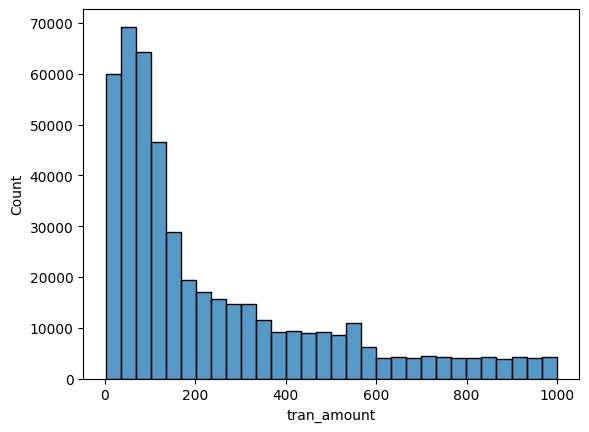

In [118]:
# Histplot was not able to be more detailed uo there because of so much data and gap between them. I see that data is mainly clustered around 0, 10000. so Let's use that range.
# Let's visualize
sns.histplot(df_transactions_cleaned_1[df_transactions_cleaned_1.tran_amount < 10000].tran_amount, bins=30) # i just used subset of data to represent more.
plt.show()

In [122]:
# Let's identify outliers with IQR.
Q1, _, Q3 = df_transactions_cleaned_1['tran_amount'].quantile([0.25, 0.5 ,0.75])
Q1, Q3
IQR = Q3 - Q1

lower = Q3 - 2*IQR
upper = Q3 + 2*IQR

lower, upper

# general guideline is 1. but we used 2 after talking to business owner. bcz 1.5 was so strict. now with 2 - more than 1100 transaction amount can be called an outlier
# we dont care about negative limit since tran_amount cannot be negative anyway

(-281.0, 1107.0)

In [126]:
df_train_outliers = df_transactions_cleaned_1[df_transactions_cleaned_1.tran_amount >= upper]
df_train_outliers.shape

(25000, 7)

In [124]:
df_transactions_cleaned_1[df_transactions_cleaned_1.tran_amount <= lower] # i said it cannot be less than 0 and even not zero.

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [127]:
df_train_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [134]:
# no outlier side of the same dataset
df_tran_normal = df_transactions_cleaned_1[df_transactions_cleaned_1.tran_amount <= upper]
df_tran_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [141]:
df_tran_per_category = df_tran_normal.groupby('product_category')['tran_amount'].mean()

In [142]:
df_transactions_cleaned_1.loc[df_train_outliers.index, 'tran_amount'] = df_train_outliers['product_category'].map(df_tran_per_category)

In [144]:
df_transactions_cleaned_1.loc[26]

tran_id                                 27
cust_id                                380
tran_date                       2023-01-01
tran_amount                      92.167205
platform                           Shopify
product_category    Beauty & Personal Care
payment_type                   Credit Card
Name: 26, dtype: object

<Axes: xlabel='tran_amount', ylabel='Count'>

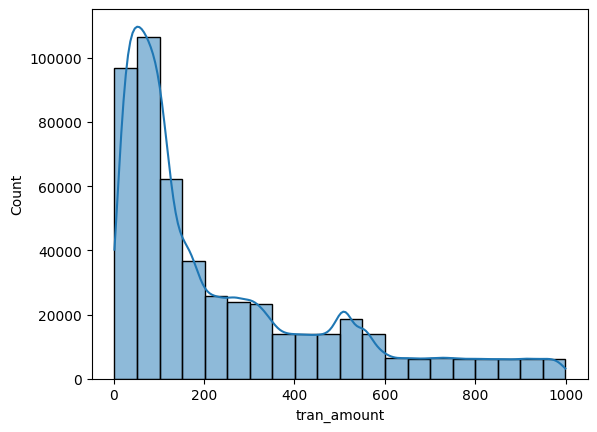

In [146]:
sns.histplot(df_transactions_cleaned_1.tran_amount, kde=True, bins=20)

<Axes: xlabel='percent', ylabel='payment_type'>

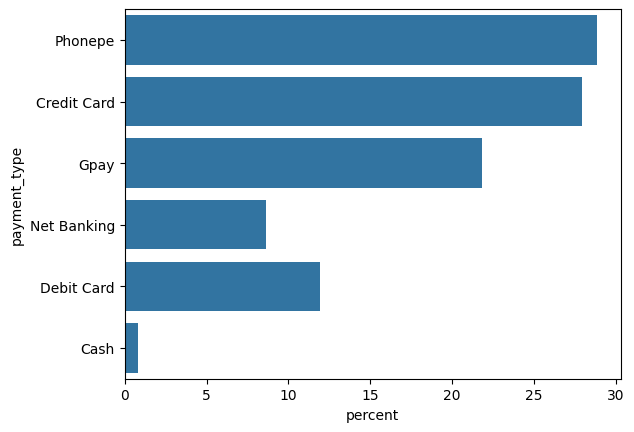

In [150]:
# Now let's work on`payment_type`. We need to see what kinda `payment_type` is preferred more and less and etc.
sns.countplot(df_transactions_cleaned_1.payment_type, stat='percent')

In [155]:
# let's now determine payment_method by age_group.
df_merged_2 = pd.merge(df_merged, df_transactions_cleaned_1, on='cust_id', how='inner')
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,600-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,600-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,600-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,600-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,600-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


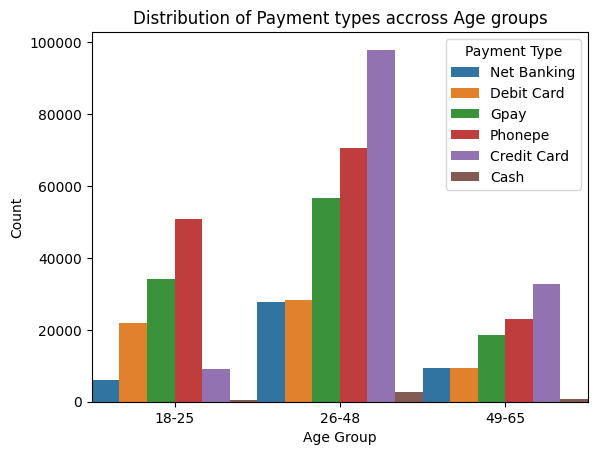

In [162]:
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, width=1)
plt.title('Distribution of Payment types accross Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count') 
plt.legend(title='Payment Type', loc='upper right')

# From above analysis, we can see that age group 18-25 has less exposure to credit cards compared to other groups

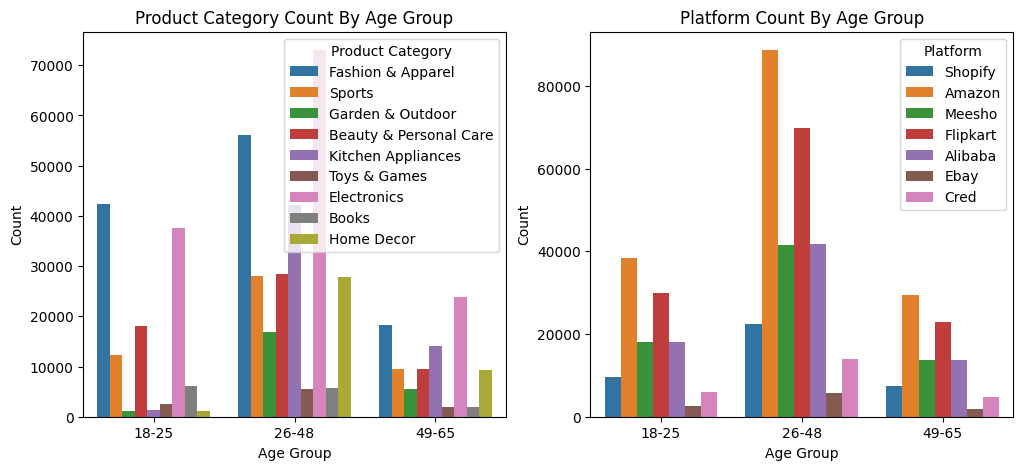

In [164]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_group', hue="product_category", data=df_merged_2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

sns.countplot(x='age_group', hue="platform", data=df_merged_2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Platform", loc='upper right')

plt.show()

### Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

### Data Visualization: Average Transaction Amount

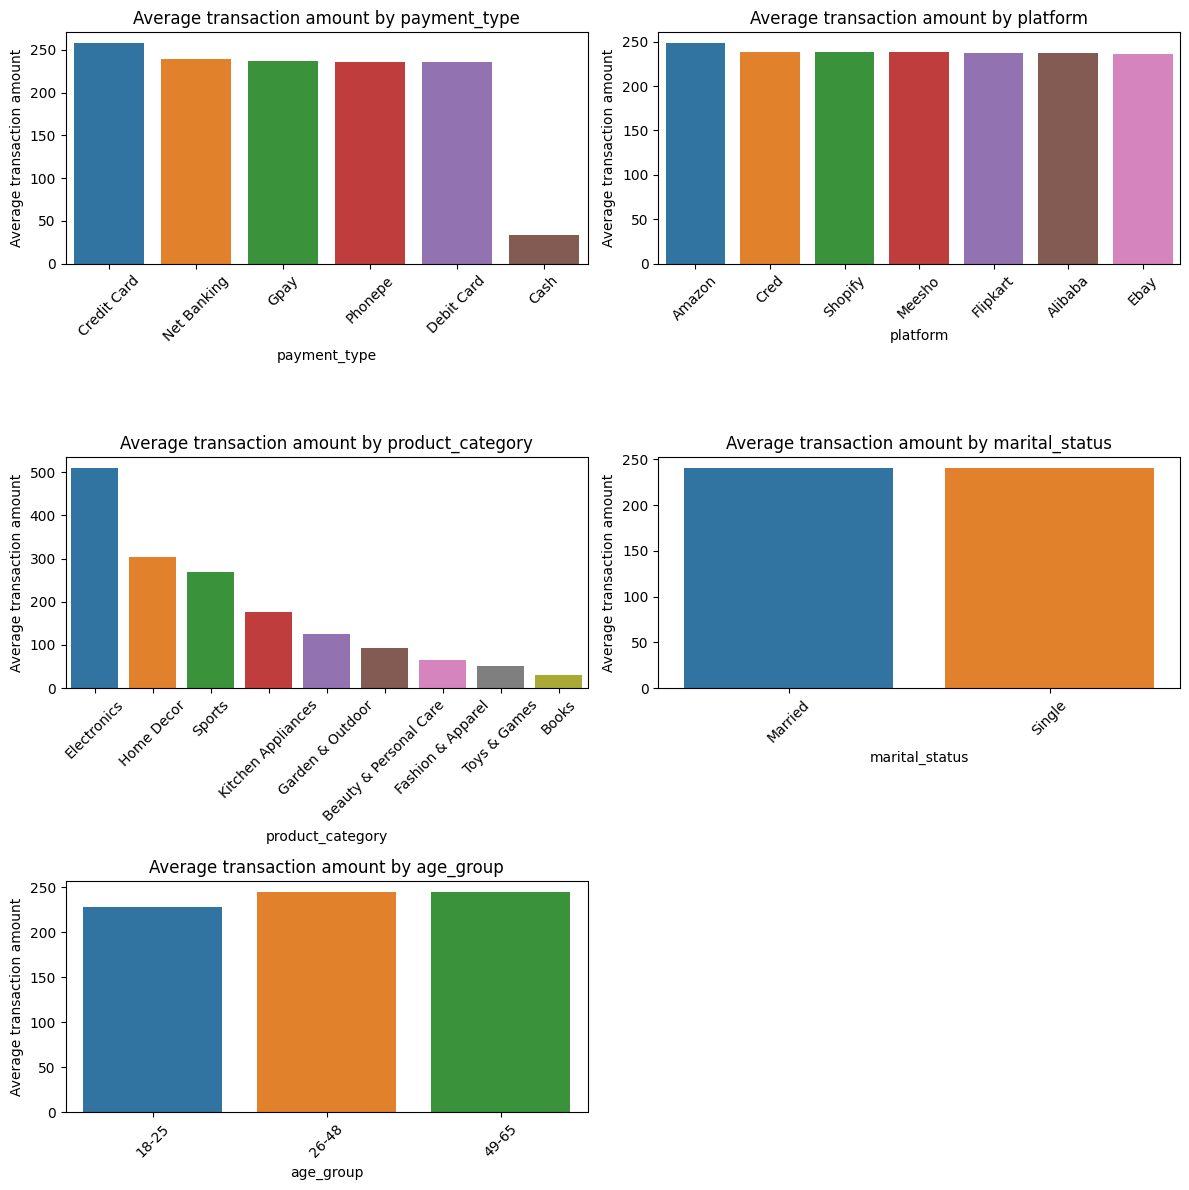

In [165]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

### Further Analysis On Age Group

Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [166]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1756.097561,484.451220
1,26-48,145869.623457,20664.021164,597.569665
2,49-65,260165.925134,41699.197861,701.524064


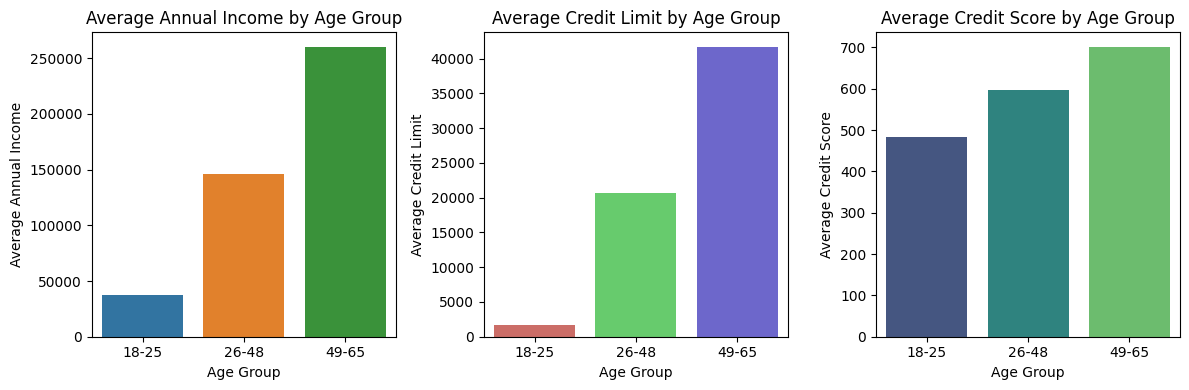

In [167]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<h2 align="center", style="color:purple">Finalize Target Market For a Trial Credit Card Launch<h2>

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care